In [1]:
from __future__ import print_function

#Python for Business Analysts

##Plotting the Rise of Computers

###1: Introduction

In this lesson, we'll be exploring Python's visualization capabilities using time series data. Time series data represent continuous processes that are dependent on time, usually measured in consistent time intervals. Some examples include:

- a pendulum's position as it swings
- a car's speed as it's being driven
- a company's stock price

For this lesson, we have downloaded the historical stock data of Microsoft, Inc. and Apple Computer, Inc. from the dates they both went public (March 13, 1986 and December 12, 1980, respectively) to July 1, 2015.

Let's first read both datasets into Pandas DataFrame objects and explore both datasets.

In [2]:
import pandas

apple_stock = pandas.read_csv("data/AAPL_historical_stock.csv")
microsoft_stock = pandas.read_csv("data/MSFT_historical_stock.csv")

# First 10 rows of Microsoft Stock data.
print("microsoft_stock:\n", microsoft_stock.head(10))

# First 10 rows of Apple Stock data.
print("apple_stock:\n", apple_stock.head(10))

microsoft_stock:
          Date      Open      High       Low     Close      Volume  Adj Close
0  13/03/1986  0.097223  0.101564  0.088543  0.097223  1031778432   0.097223
1  14/03/1986  0.097223  0.102432  0.097223  0.100695   308156864   0.100695
2  17/03/1986  0.100695  0.103300  0.100695  0.102432   133169856   0.102432
3  18/03/1986  0.102432  0.103300  0.098959  0.099827    66469728   0.099827
4  19/03/1986  0.099827  0.100695  0.097223  0.098091    47893920   0.098091
5  20/03/1986  0.098091  0.098091  0.094619  0.095487    58434560   0.095487
6  21/03/1986  0.095487  0.097223  0.091147  0.092883    59989760   0.092883
7  24/03/1986  0.092883  0.092883  0.089411  0.090279    65288928   0.090279
8  25/03/1986  0.090279  0.092015  0.089411  0.092015    32082816   0.092015
9  26/03/1986  0.092015  0.095487  0.091147  0.094619    22751712   0.094619
apple_stock:
          Date      Open      High       Low     Close     Volume  Adj Close
0  12/12/1980  0.513392  0.513392  0.513392  

###2: Columns

The following fields of information for each day:

- Open - the price the stock opened at
- High - the highest price the stock hit
- Low - the lowest price the stock dropped to
- Close - the final price the stock settled at
- Volume - the trading volume, or amount of stock traded
- Adj Close - the adjusted Close price

To easily slice and filter these dates and timestamps, we need to specify using Pandas that we want the Date column to be treated as a datetime64 data type. The datetime64 data type, or dtype, is highly optimized for querying and interacting with dates like the ones we have in both datasets.

####Instructions

Use the Pandas <a href = "http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html">to_datetime() function</a> to convert the Date column to the datetime64 dtype.

In [3]:
microsoft_stock['Date'] = pandas.to_datetime(microsoft_stock['Date'])
apple_stock['Date'] = pandas.to_datetime(apple_stock['Date'])

###3: Plotting Columns

Now that the Date columns are in the datetime format, we can easily slice both datasets and visually compare them. More specifically, we can segment our data into years, decades, and other subsets of the stock price data that could help us better understand the rise of both companies.

Now we'll learn about a library called <a href = "http://matplotlib.org/api/pyplot_api.html">Matplotlib</a>, which makes it easy to plot all kinds of graphs just by specifying the data we want visualized. Let's first plot the full time series of the closing stock prices, with Date on the x-axis and Close on the y-axis. As with the Pandas library, we will need to import the Matplotlib library into our environment to be able to use it.

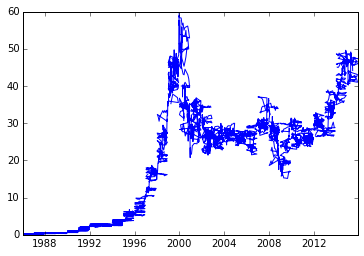

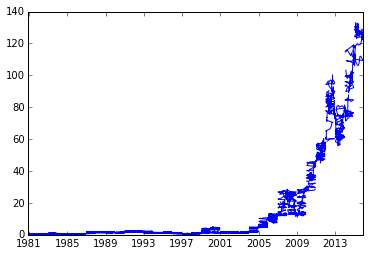

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot() tells Python to create a new plot and what the X (first argument) and Y (second argument) axes are
plt.plot(microsoft_stock['Date'], microsoft_stock['Close'])
plt.show()

# New plot, repeat for Apple as we did with Microsoft
plt.plot(apple_stock['Date'], apple_stock['Close'])
plt.show()

###4: Explanation

As you can see, plotting the Close column for both companies using plt.plot() was as easy as specifying Date on the x-axis and Close on the Y-axis, optionally adding a title, and finally revealing the plot using plt.show(). We first specify how we want each plot to look like and run plt.show() after specifying each plot because we are indicating that we want the data to be visualized in 2 different charts instead of both on the same chart. Specifying both plots first and then running plt.show() would overlay both plots on the same chart.

###5: Trading Volume

Let's now visualize the historical time series of the trading volume for both companies. The trading volume is measured by the number of shares that were exchanged in trades made that day. Plotting trading volumes for the respective stocks helps us identify rare and important events in the market or in the company, because investors will be more likely to buy or sell shares at that time.

####Instructions

Generate 2 plots, in the following order:

- Microsoft: Date on x-axis and Volume on y-axis
- Apple: Date on x-axis and Volume on y-axis

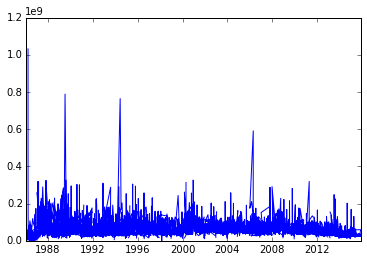

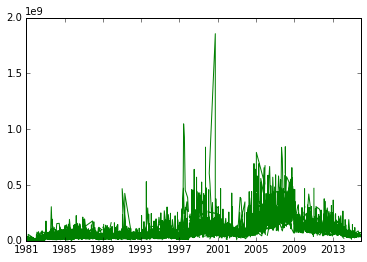

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(microsoft_stock['Date'], microsoft_stock['Volume'])
plt.show()

plt.plot(apple_stock['Date'], apple_stock['Volume'], color="green")
plt.show()

###6: Explanation

The charts suggest that Microsoft had two periods (1989-1991 and 1993-1995) with abnormally high trading volume with a somewhat close 3rd period (2005-2007) while Apple had one period that really stood out (roughy in 1999-2002). Using this vantage point, we can develop many hypotheses that we can then explore and test further. For example, one hunch could be that the Dot Com bubble burst in 2001 was more turbulent for Apple than for Microsoft. This sort of initial probing is essential for us, as data analysts, because this is how we build the important questions to glean insights from the vast amount of data we deal with.

###7: Filtering and Plotting

Let's now take advantage of Pandas' filtering capabilities, that we explored in previous lessons, to zoom in to the peak of the Dot Com bubble (1999 - 2002) for both companies and plot the results.

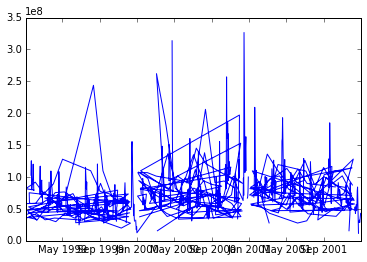

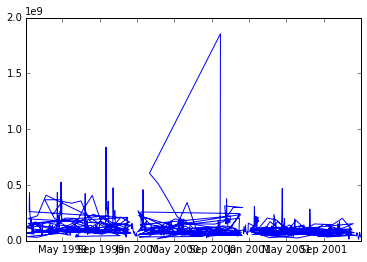

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Filter dates to be greater than Jan 1, 1999 but less than Jan 1, 2002.
microsoft_bubble = microsoft_stock[(microsoft_stock['Date'] > '1999-01-01') & (microsoft_stock['Date'] < '2002-01-01')]
plt.plot(microsoft_bubble['Date'], microsoft_bubble['Volume'])
plt.show()

# Repeat for Apple!
apple_bubble = apple_stock[(apple_stock['Date'] > '1999-01-01') & (apple_stock['Date'] < '2002-01-01')]
plt.plot(apple_bubble['Date'], apple_bubble['Volume'])
plt.show()

###8: Conclusion

It looks like Microsoft had several medium sized spikes in trading volume, as each spike was a smaller multiple of the resting or average trading volume during the filtered time period. Apple, on the other hand, had one very clearly defined spike around Winter of 2000 that was a large multiple of its resting trading volume. This confirms our guess that the bubble bursting impacted Apple more sharply and abruptly than it did Microsoft. However we can still dig deeper by asking more questions. If you are interested in exploring further, you could see what the opening and closing prices were during this time frame, as well as their spread, to see how adversely each company was affected.

In this lesson, we introduced the Matplotlib library to allow us to move from question to graph in seconds. We could combine the other powerful features of Python and Pandas to give us very fine grained control of the data we want to visualize. In Excel, graphing and filtering can be more time consuming and imprecise when compared to Python. Not to mention that this is only the tip of the iceberg when it comes to plotting and exploring data programmatically. Stay tuned for more courses on plotting and analyzing data using Python!